# MOBILITY ANALYTICS

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene, f_oneway
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [264]:
df_mob_service = pd.read_csv("yulu.csv")

In [265]:
df_mob_service.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


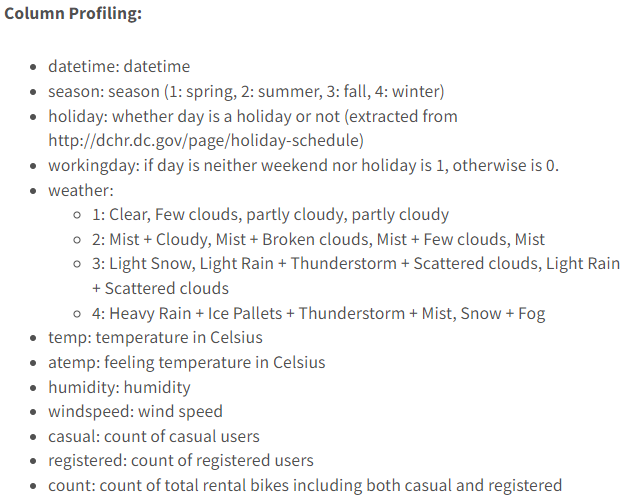

"Feeling temperature" in the context of weather usually refers to the "apparent temperature" or "wind chill." It's a measure of how the temperature feels to the human body, taking into account factors like wind speed and humidity, which can affect how cold or warm it actually feels compared to the actual air temperature.

#### 1. Creating deep copy of original data.

In [269]:
# creating deep copy
df = df_mob_service.copy()

#### 2. Adding date column and converting 'datetime' column to datetime data type

In [326]:
# Convert 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the date component and create a new 'date' column
df['date'] = df['datetime'].dt.date


In [292]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


### Basic Analysis

In [293]:
# 1. Information / total row - column / datatype / Non null_count

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB
None


In [294]:
# 2 . Total missing value in each column

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
dtype: int64

In [295]:
# 3. describing numerical data

df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].describe()


,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [296]:
# 4. shape

df.shape

(10886, 13)

In [297]:
# 5. dimension

df.ndim

2

## 1. EDA

### 1. Univariate analysis

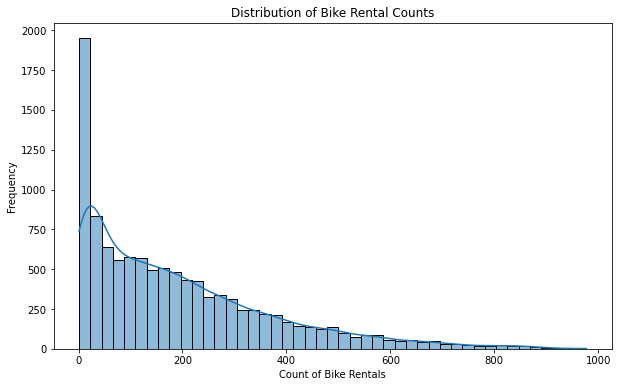

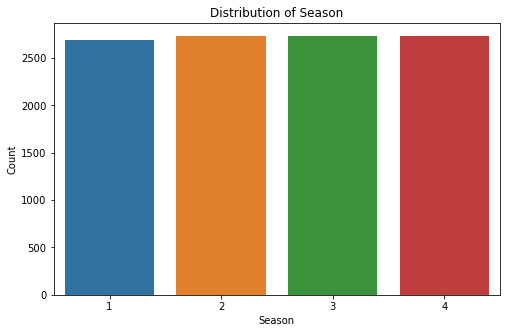

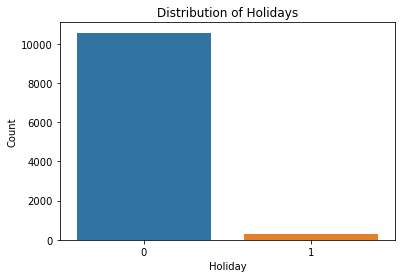

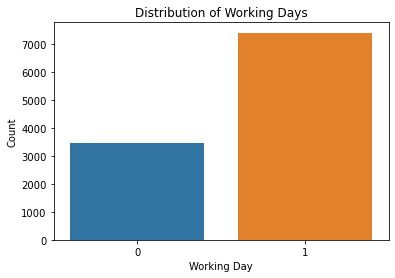

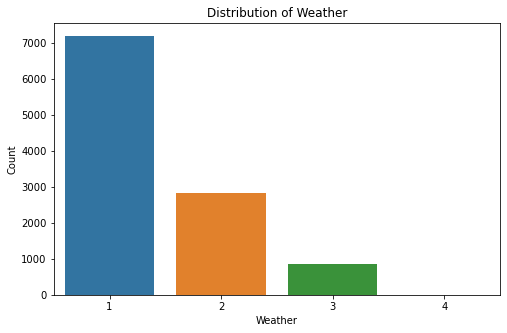

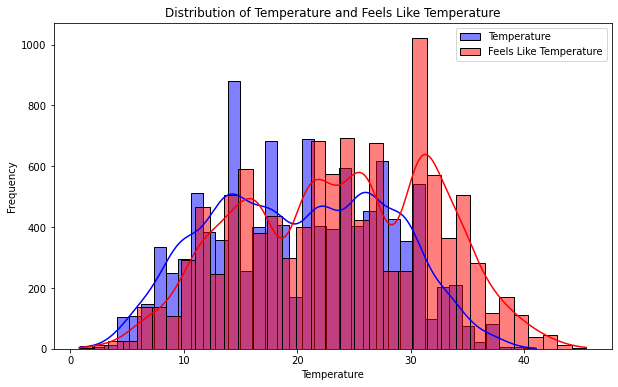

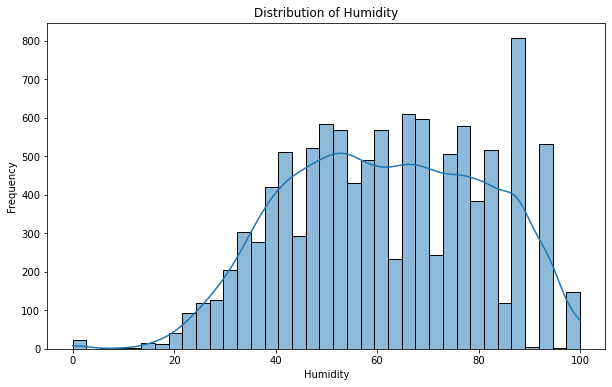

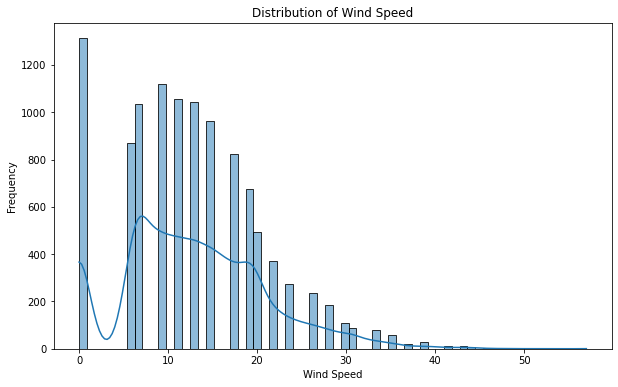

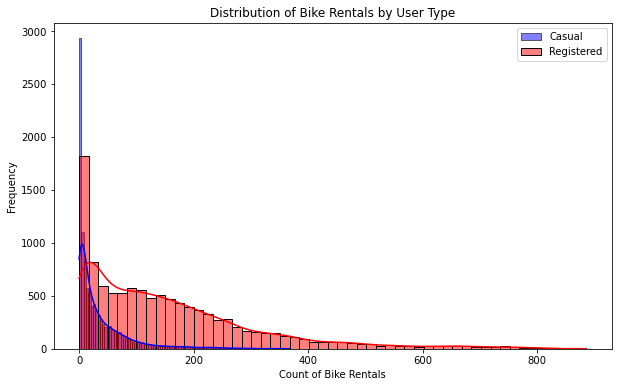

In [298]:
# Univariate Analysis

# 1. Count of Bike Rentals
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], kde=True)
plt.title("Distribution of Bike Rental Counts")
plt.xlabel("Count of Bike Rentals")
plt.ylabel("Frequency")
plt.show()

# 2. Season
plt.figure(figsize=(8, 5))
sns.countplot(x='season', data=df)
plt.title("Distribution of Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

# 3. Holiday
plt.figure(figsize=(6, 4))
sns.countplot(x='holiday', data=df)
plt.title("Distribution of Holidays")
plt.xlabel("Holiday")
plt.ylabel("Count")
plt.show()

# 4. Working Day
plt.figure(figsize=(6, 4))
sns.countplot(x='workingday', data=df)
plt.title("Distribution of Working Days")
plt.xlabel("Working Day")
plt.ylabel("Count")
plt.show()

# 5. Weather
plt.figure(figsize=(8, 5))
sns.countplot(x='weather', data=df)
plt.title("Distribution of Weather")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

# 6. Temperature and "Feels Like" Temperature (atemp)
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'], kde=True, label='Temperature', color='blue')
sns.histplot(df['atemp'], kde=True, label='Feels Like Temperature', color='red')
plt.title("Distribution of Temperature and Feels Like Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 7. Humidity
plt.figure(figsize=(10, 6))
sns.histplot(df['humidity'], kde=True)
plt.title("Distribution of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()

# 8. Wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(df['windspeed'], kde=True)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()

# 9. Casual and Registered Users
plt.figure(figsize=(10, 6))
sns.histplot(df['casual'], kde=True, label='Casual', color='blue')
sns.histplot(df['registered'], kde=True, label='Registered', color='red')
plt.title("Distribution of Bike Rentals by User Type")
plt.xlabel("Count of Bike Rentals")
plt.ylabel("Frequency")
plt.legend()
plt.show()




### 2. Bivariate analysis

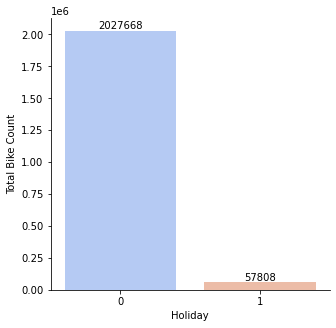

holiday
0    2027668
1      57808
Name: count, dtype: int64

In [299]:
# 1. Count of bike rented vs holiday

# Calculate the sum of bike counts for each season
holiday_wise = df.groupby("holiday")["count"].sum()

# Create a bar plot
plt.figure(figsize=(5,5))
ax = sns.barplot(x=holiday_wise.index, y=holiday_wise.values ,palette = "coolwarm" )

# Add labels to the axes
plt.xlabel("Holiday")
plt.ylabel("Total Bike Count")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container , fmt='%.0f')
    
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Show the plot
plt.show()

holiday_wise

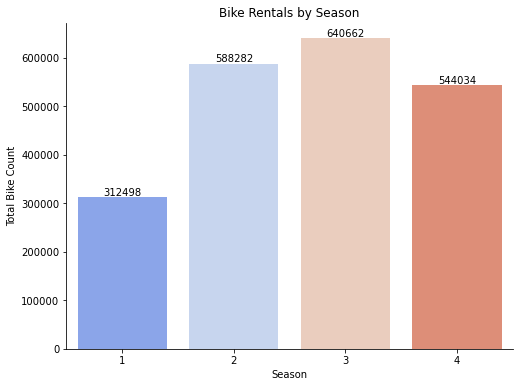

In [300]:
# 2. Count of bike rented vs season

# Calculate the sum of bike counts for each season
season_wise = df.groupby("season")["count"].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=season_wise.index, y=season_wise.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Season")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals by Season")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container)

# Customize axis ticks and labels
plt.xticks(rotation=0)  # No rotation for x-axis labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


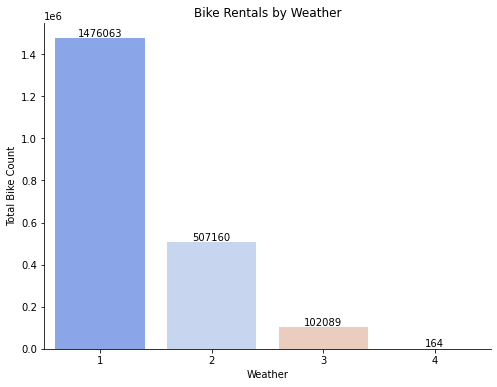

In [301]:
# 3. Count of bike rented vs weather

# Calculate the sum of bike counts for each season
weather_wise = df.groupby("weather")["count"].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=weather_wise.index, y=weather_wise.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Weather")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals by Weather")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Customize axis ticks and labels
plt.xticks(rotation=0)  # No rotation for x-axis labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


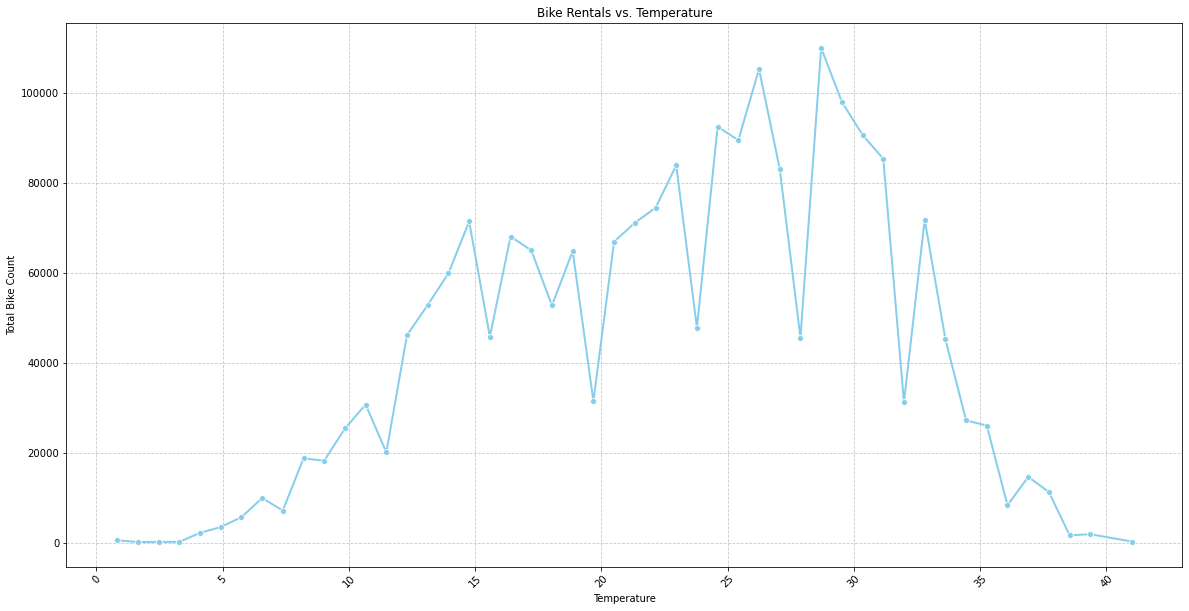

In [302]:
# 4.  Count of bike rented vs temp

# Calculate the sum of bike counts for each temperature
temp_counts = df.groupby("temp")["count"].sum()

# Create a line plot
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=temp_counts.index, y=temp_counts.values, marker='o', color='skyblue', linewidth=2)

# Add labels and title
plt.xlabel("Temperature")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals vs. Temperature")

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize axis ticks and labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

'''
# Show data points as markers
ax.set(xticks=temp_counts.index)
ax.set_xticklabels(temp_counts.index, rotation=45, ha='right')
'''

# Show the plot
plt.show()


Observation : 

- Most bike is rented in temp range between 25 - 32.
- Bike rented least when temp is too cold (<10) or too hot (>35).


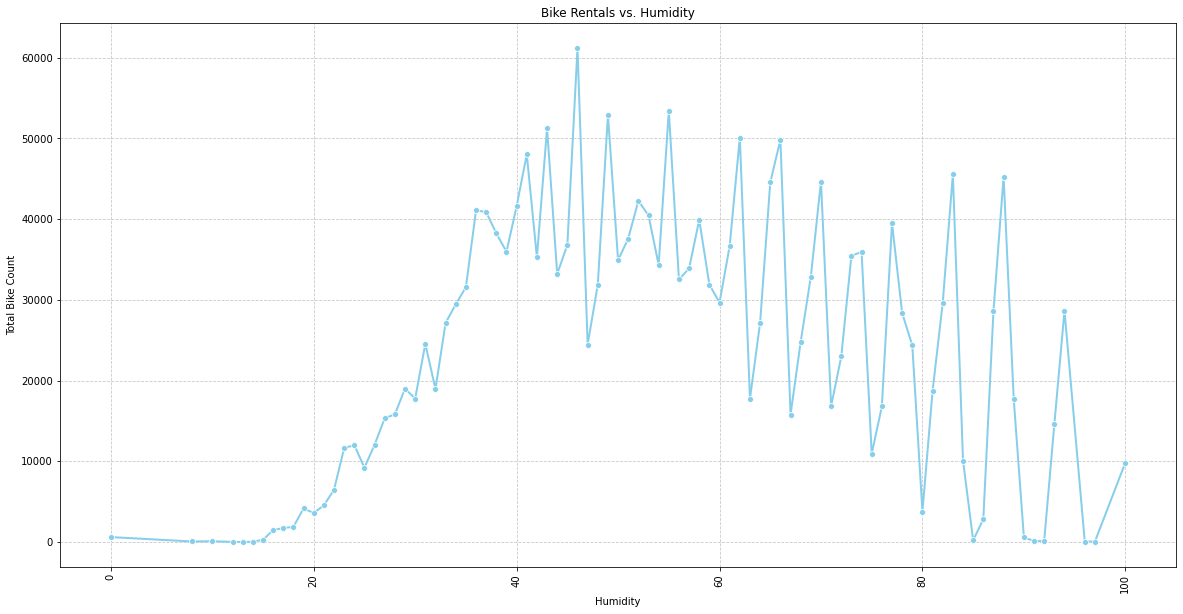

In [303]:
#.5 Count of bike rented vs humidity

# Calculate the sum of bike counts for each temperature
humid_counts = df.groupby("humidity")["count"].sum()

# Create a line plot
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=humid_counts.index, y=humid_counts.values, marker='o', color='skyblue', linewidth=2)

# Add labels and title
plt.xlabel("Humidity")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals vs. Humidity")

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize axis ticks and labels
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

'''
# Show data points as markers
ax.set(xticks=humid_counts.index)
ax.set_xticklabels(humid_counts.index, rotation=90, ha='right')
'''

# Show the plot
plt.show()


Observation : 
- Most bike is rented in humidity level ranges between 45 - 55.
- Bike rented least when temp is less humidity level (<35).
- For higher humidity it is highly variable more analysis need to be done.

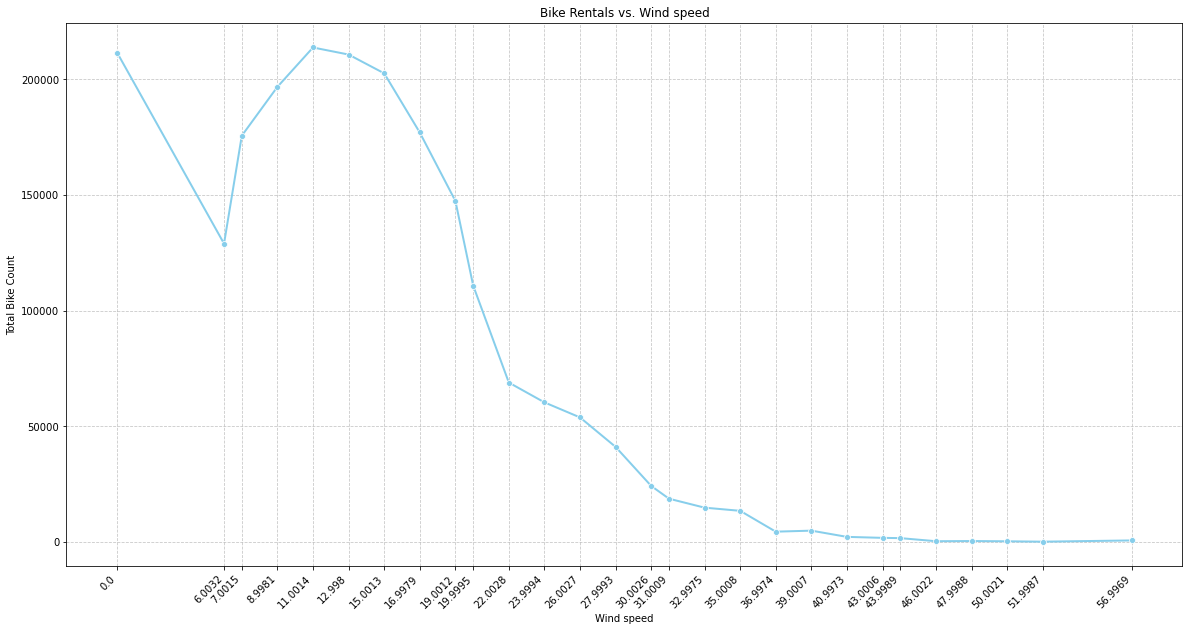

In [304]:
# 6.  Count of bike rented vs speed.

# Calculate the sum of bike counts for each temperature
wind_counts = df.groupby("windspeed")["count"].sum()

# Create a line plot
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=wind_counts.index, y=wind_counts.values, marker='o', color='skyblue', linewidth=2)

# Add labels and title
plt.xlabel("Wind speed")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals vs. Wind speed")

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize axis ticks and labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


# Show data points as markers
ax.set(xticks=wind_counts.index)
ax.set_xticklabels(wind_counts.index, rotation=45, ha='right')


# Show the plot
plt.show()


Observation :

- Most bike is rented in when wind speed in calm i.e rounded off to 0 , and when speed between 7 to 12.
- Sharp decline in the bike rented as the speed increses from 12 .

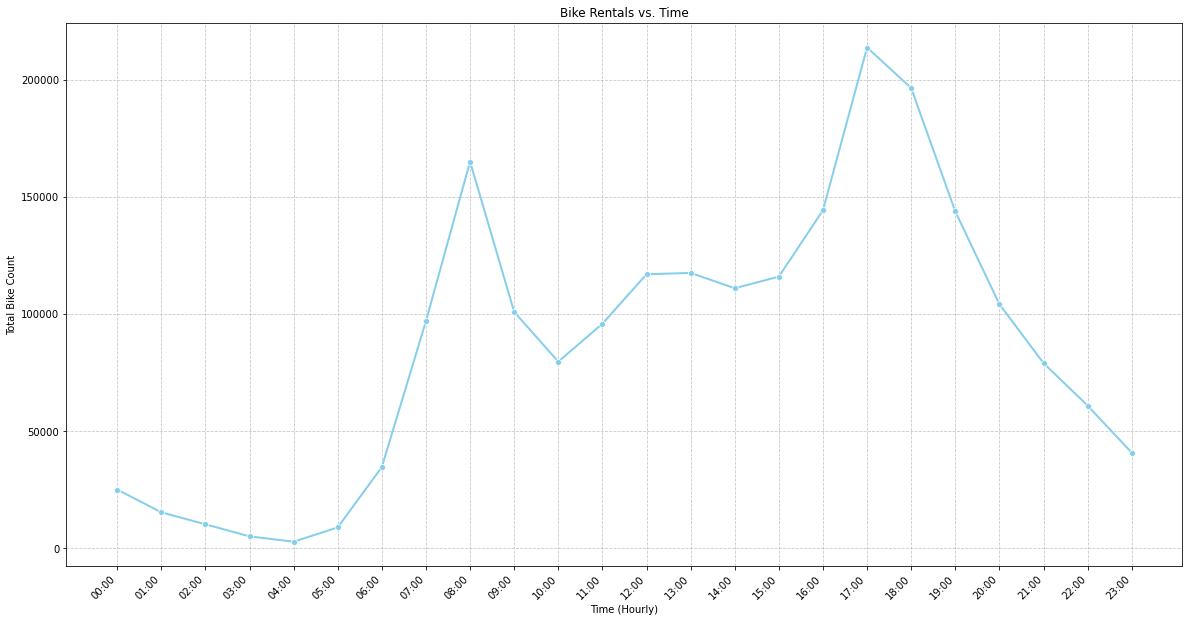

In [305]:
# 6.  Count of bike rented vs time.

# Ensure the "datetime" column is in a datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Calculate the sum of bike counts for each hour
hourly_counts = df.groupby(df['datetime'].dt.strftime('%H:00'))['count'].sum()

# Create a line plot
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='skyblue', linewidth=2)

# Add labels and title
plt.xlabel("Time (Hourly)")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals vs. Time")

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize axis ticks and labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show data points as markers
ax.set(xticks=range(len(hourly_counts.index)))
ax.set_xticklabels(hourly_counts.index, rotation=45, ha='right')

# Show the plot
plt.show()




Observation :

- Most bike is rented time interval (07:00 AM - 09:00 AM) & (04:00 PM to 06:00 PM)


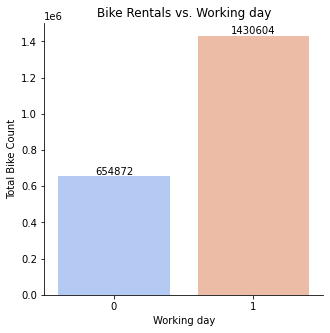

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [306]:
# 7. Count of bike rented vs holiday

# Calculate the sum of bike counts for each season
workingday_wise = df.groupby("workingday")["count"].sum()

# Create a bar plot
plt.figure(figsize=(5,5))
ax = sns.barplot(x=workingday_wise.index, y=workingday_wise.values ,palette = "coolwarm" )

# Add labels to the axes
plt.xlabel("Working day")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals vs. Working day")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container , fmt='%.0f')
    
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

workingday_wise

# 2. Hypothesis Testing

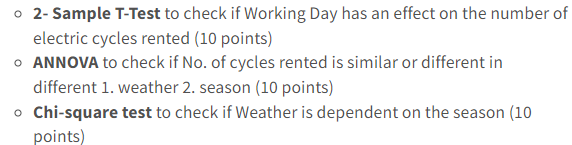

#### taking significance alpha = 0.05 

In [307]:
alpha = 0.05

### 1 : 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

##### Calculate the sum of bike counts depending of working day

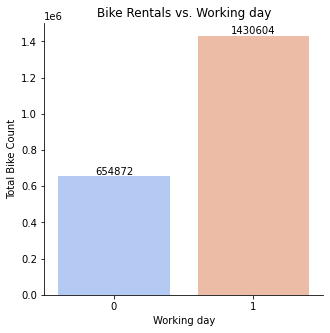

In [308]:
# Calculate the sum of bike counts depending of working day
workingday_wise = df.groupby("workingday")["count"].sum()

# Create a bar plot
plt.figure(figsize=(5,5))
ax = sns.barplot(x=workingday_wise.index, y=workingday_wise.values ,palette = "coolwarm" )

# Add labels to the axes
plt.xlabel("Working day")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals vs. Working day")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container , fmt='%.0f')
    
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

###### Calculate the average number of bikes rented per day for each working day category

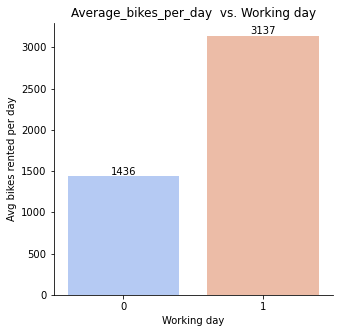

In [309]:
# Calculate the total count of rental bikes for each working day
workingday_wise = df.groupby("workingday")["count"].sum()

# Calculate the total number of unique days
total_days = df["date"].nunique()

# Calculate the average number of bikes rented per day for each working day category
average_bikes_per_day = workingday_wise / total_days

plt.figure(figsize=(5,5))
ax = sns.barplot(x=average_bikes_per_day.index, y=average_bikes_per_day.values ,palette = "coolwarm" )

# Add labels to the axes
plt.xlabel("Working day")
plt.ylabel("Avg bikes rented per day")
plt.title("Average_bikes_per_day  vs. Working day")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container , fmt='%.0f')
    
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


Intuition :
- From the graph and on calculation : it shows bike rented on working day is more in comparision with bike rented on non-working day.

- Is the difference between the mean is statistically significant ?
Conducting Hypothesis test : ttest_ind for validating our hypothesis. 
    
    
    

###### Creating groups for statistical testing

In [310]:
working_df = df.loc[df['workingday'] == 1, ["count"]]
working_df.reset_index(inplace=True, drop=True)
print(f"Mean value of bikes rented for working day: {working_df['count'].sum()/total_days}")

non_working_df = df.loc[df['workingday'] == 0, ["count"]]
non_working_df.reset_index(inplace=True, drop=True)
print(f"Mean value of bikes rented for non-working day: {non_working_df['count'].sum()/total_days}")


Mean value of bikes rented for working day: 3137.2894736842104
Mean value of bikes rented for non-working day: 1436.122807017544


In [311]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


#### Ttest_ind  - Effect of working and non working on on of bike rented 

In [312]:
alpha = 0.05

Normality 

1 . Checking data provided - working day - Follows normal distribution 


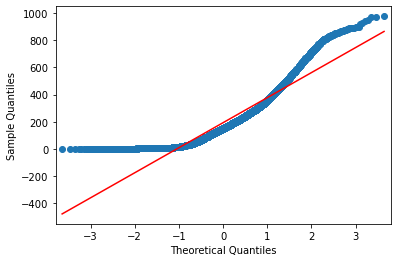

Shapiro-Wilk Test for Working Day - p-value: 5.320948730513919e-06
Reject the null hypothesis: The data is not normally distributed.
Q-Q plot for the transformed distribution


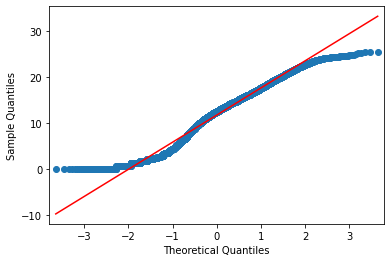

Shapiro-Wilk Test for Transformed Data - p-value: 0.30872663855552673
Fail to reject the null hypothesis: The transformed data is normally distributed.

2 . Checking data provided - non working day - Follows normal distribution 


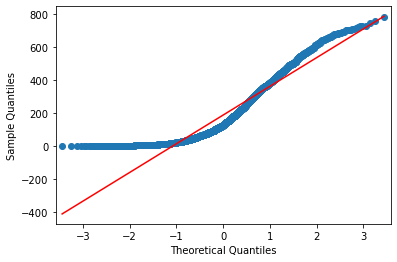

Shapiro-Wilk Test for Working Day - p-value: 4.887571412837133e-05
Reject the null hypothesis: The data is not normally distributed.
Q-Q plot for the transformed distribution


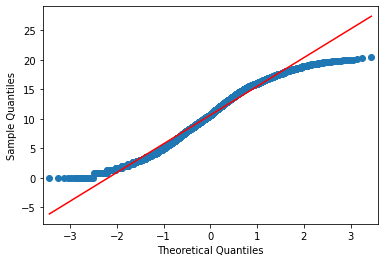

Shapiro-Wilk Test for Transformed Data - p-value: 0.011083032004535198
Reject the null hypothesis: The transformed data is not normally distributed.

Homogeneity of Variance 

Levene's Test - p-value: 0.9437823280916695
Fail to reject the null hypothesis: The variances are equal.

 Ttest 

p_value_ttest : 0.22644804226361348
Fail to reject the null hypothesis: There is no significant difference in bike rentals between working and non-working days.


In [313]:
# Sample size for testing assumptions
sample_size = 70

# Assumption 1: Normality
print("Normality \n")
print ("1 . Checking data provided - working day - Follows normal distribution ")

# Q-Q plot for the original working day data
count_data = working_df["count"]
qqplot(count_data, line='s')
plt.show()

# (Shapiro-Wilk Test)

# Null Hypothesis (H0): The data is normally distributed
# Alternate Hypothesis (H1): The data is not normally distributed

# Randomly sample from the working day data
sample_wor = np.random.choice(working_df['count'], sample_size, replace=True)

# Perform Shapiro-Wilk Test for Working Day
statistic_workday, p_value_workday = shapiro(sample_wor)

print(f"Shapiro-Wilk Test for Working Day - p-value: {p_value_workday}")

# Check if the p-value is less than 0.05 to determine normality assumption
if p_value_workday < 0.05:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

# Box-Cox transformation for normality
transformed_dis, _ = stats.boxcox(count_data)
print("Q-Q plot for the transformed distribution")
qqplot(transformed_dis, line="s")
plt.show()

# Randomly sample from the transformed distribution
sample_transformed_dis_work = np.random.choice(transformed_dis, sample_size, replace=True)

# Perform Shapiro-Wilk Test for transformed data
test_stat, p_value = stats.shapiro(sample_transformed_dis_work)
print(f"Shapiro-Wilk Test for Transformed Data - p-value: {p_value}")

# Check if the p-value is less than 0.05 to determine normality assumption
if p_value < 0.05:
    print("Reject the null hypothesis: The transformed data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The transformed data is normally distributed.")

    
    
    
    
# 2. Non working group    
print()    
print ("2 . Checking data provided - non working day - Follows normal distribution ")

# Q-Q plot for the original working day data

count_data = non_working_df["count"]
qqplot(count_data, line='s')
plt.show()

# (Shapiro-Wilk Test)

# Null Hypothesis (H0): The data is normally distributed
# Alternate Hypothesis (H1): The data is not normally distributed

# Randomly sample from the working day data
sample_wor = np.random.choice(non_working_df['count'], sample_size, replace=True)

# Perform Shapiro-Wilk Test for Working Day
statistic_workday, p_value_workday = shapiro(sample_wor)

print(f"Shapiro-Wilk Test for Working Day - p-value: {p_value_workday}")

# Check if the p-value is less than 0.05 to determine normality assumption
if p_value_workday < 0.05:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

# Box-Cox transformation for normality
transformed_dis, _ = boxcox(count_data)
print("Q-Q plot for the transformed distribution")
qqplot(transformed_dis, line="s")
plt.show()

# Randomly sample from the transformed distribution
sample_transformed_dis_nwork = np.random.choice(transformed_dis, sample_size, replace=True)

# Perform Shapiro-Wilk Test for transformed data
test_stat, p_value = stats.shapiro(sample_transformed_dis_nwork)
print(f"Shapiro-Wilk Test for Transformed Data - p-value: {p_value}")

# Check if the p-value is less than 0.05 to determine normality assumption
if p_value < 0.05:
    print("Reject the null hypothesis: The transformed data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The transformed data is normally distributed.")  
    
    
    
#########################################################################################################

print("\nHomogeneity of Variance \n")
# Assumption 3: Homogeneity of Variance (Levene's Test)
# Null Hypothesis (H0): The variances are equal
# Alternate Hypothesis (H1): The variances are not equal

statistic_levene, p_value_levene = stats.levene(working_df['count'], non_working_df['count'])
print(f"Levene's Test - p-value: {p_value_levene}")

# Check if the p-value is less than 0.05 to determine homogeneity of variance
if p_value_levene < 0.05:
    print("Reject the null hypothesis: The variances are not equal.")
else:
    print("Fail to reject the null hypothesis: The variances are equal.")

#####################################################################
    
# 2-Sample T-Test
# Null Hypothesis (H0): There is no significant difference in the mean number of bike rentals between working and non-working days.
# Alternate Hypothesis (H1): There is a significant difference in the mean number of bike rentals between working and non-working days.

print("\n Ttest \n")

t_statistic, p_value_ttest = ttest_ind(working_df["count"],non_working_df["count"])

print(f"p_value_ttest : {p_value_ttest}")
# Check if the p-value is less than 0.05 to determine statistical significance
alpha = 0.05
if p_value_ttest < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rentals between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between working and non-working days.")


#### Observation : 

- Even after boxcox tranformation - Normality assumption not met.
- T-Test is robust to mild violations of the normality assumption, especially if the sample sizes are large. 
- We can use -- Mann-Whitney U-test -- it does not depend upon normality aassumption.

#### Conclusion (Using ttest): 

- There is no significant difference in the mean number of bike rentals between working and non-working days. Difference in mean is by chance

### Mann-Whitney U-test (as normality assuption not met for ttest)

In [314]:
import scipy.stats as stats

# Define your two groups (working day and non-working day)
working_day_data = df[df['workingday'] == 1]['count']
non_working_day_data = df[df['workingday'] == 0]['count']

# Perform the Mann-Whitney U-test
statistic, p_value = stats.mannwhitneyu(working_day_data, non_working_day_data, alternative='two-sided')

# Print the results
print(f"Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Check if the p-value is less than your chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Statistic: 12868495.5
P-Value: 0.9679139953914079
Fail to reject the null hypothesis: There is no significant difference between the groups.


##### Conclusion :
- There is no significant difference in the mean number of bike rentals between working and non-working days. Difference in mean is by chance

### 2 : Anova to check if No. of cycles rented is similar or different in different 1. weather 2. season

### 1. Weather

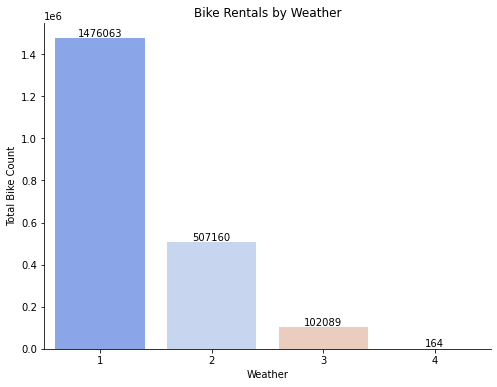

In [315]:
# Count of bike rented vs weather

# Calculate the sum of bike counts for each season
weather_wise = df.groupby("weather")["count"].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=weather_wise.index, y=weather_wise.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Weather")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals by Weather")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Customize axis ticks and labels
plt.xticks(rotation=0)  # No rotation for x-axis labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

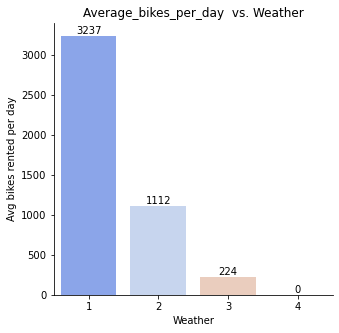

In [316]:
# Calculate the total count of rental bikes for diffrent weather condition
weather_wise = df.groupby("weather")["count"].sum()

# Calculate the total number of unique days
total_days = df["date"].nunique()

# Calculate the average number of bikes rented per day for weather
average_bikes_per_day = weather_wise / total_days

plt.figure(figsize=(5,5))
ax = sns.barplot(x=average_bikes_per_day.index, y=average_bikes_per_day.values ,palette = "coolwarm" )

# Add labels to the axes
plt.xlabel("Weather")
plt.ylabel("Avg bikes rented per day")
plt.title("Average_bikes_per_day  vs. Weather")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container , fmt='%.0f')
    
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [317]:
weather_unique = df["weather"].unique()

# Create an empty dictionary to store weather condition groups
weather_groups = {}

for weather_code in weather_unique:
    # Filter the DataFrame for the specific weather condition
    weather_df = df.loc[df['weather'] == weather_code].copy()  # Using .copy() to create independent DataFrames
    
    # Reset the index
    weather_df.reset_index(drop=True, inplace=True)
    
    # Store the DataFrame in the dictionary with the weather code as the key
    weather_groups[weather_code] = weather_df
    
'''for weather_code, weather_df in weather_groups.items():
    
    print(f"Group as per weather condition {weather_code}\n{weather_df.head(5)}")
    '''


# Access individual weather condition groups using the dictionary
for weather_code, weather_df in weather_groups.items():
    mean_count = (weather_df['count'].sum()) / total_days
    print(f"Mean value of bikes rented when weather condition is {weather_code}: {mean_count}")



Mean value of bikes rented when weather condition is 1: 3236.9802631578946
Mean value of bikes rented when weather condition is 2: 1112.1929824561403
Mean value of bikes rented when weather condition is 3: 223.87938596491227
Mean value of bikes rented when weather condition is 4: 0.35964912280701755


To determine if there are statistically significant differences among the means of groups.

#### ANOVA - Assumptions

Testing assumptions for Weather Condition 1

Testing Normality Assumption:
Q-Q plot to visualize whether the distribution of 'count' follows a normal distribution


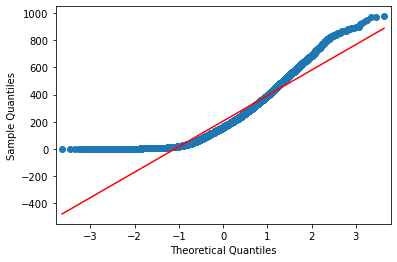

Conducting Shapiro-Wilk test to quantify our intuition
p value: 0.00010898770415224135
Distribution of 'count' is not Gaussian 

Let's try to transform it to a normal distribution using Boxcox.
Q-Q plot for the transformed distribution


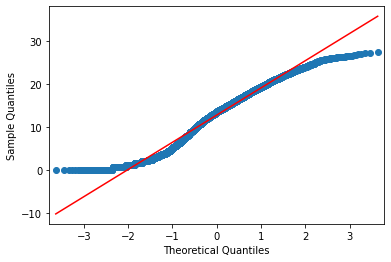


Conducting Shapiro-Wilk test for transformed data
p value: 0.8315963745117188
Transformed data guassian 

Testing assumptions for Weather Condition 2

Testing Normality Assumption:
Q-Q plot to visualize whether the distribution of 'count' follows a normal distribution


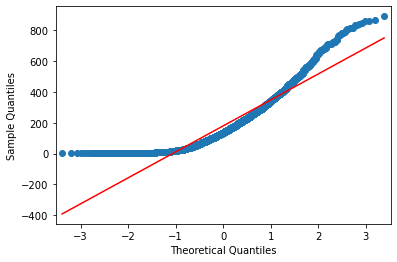

Conducting Shapiro-Wilk test to quantify our intuition
p value: 1.2080575970685459e-06
Distribution of 'count' is not Gaussian 

Let's try to transform it to a normal distribution using Boxcox.
Q-Q plot for the transformed distribution


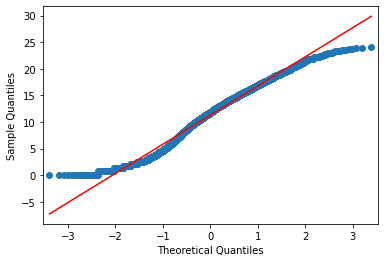


Conducting Shapiro-Wilk test for transformed data
p value: 0.008769205771386623
Transformed data is not Gaussian

Kruskal-Wallis Test for all Weather Conditions vs 'count'
p value: 3.501611300708679e-44
At least one wheather condition affects the bike being rented.


In [318]:

#1.  Checking normality assumption :

no_of_unique_weather = len(df["weather"].unique())

counter = 0

for weather_code, weather_df in weather_groups.items():
    print(f"Testing assumptions for Weather Condition {weather_code}\n")
    
    # Extract 'count' data for the current weather condition
    count_data = weather_df['count']
    
    # B1. Normality Assumption
    print("Testing Normality Assumption:")
    
    # Q-Q plot
    print("Q-Q plot to visualize whether the distribution of 'count' follows a normal distribution")
    qqplot(count_data, line='s')
    plt.show()

    # Shapiro-Wilk test
    print("Conducting Shapiro-Wilk test to quantify our intuition")
    test_stat, p_value = shapiro(count_data.sample(70 , replace =True))
    print(f"p value: {p_value}")

    if p_value < 0.05:
        print("Distribution of 'count' is not Gaussian \n")
        print("Let's try to transform it to a normal distribution using Boxcox.")

        # Box-cox transformation
        transformed_dis, _ = boxcox(count_data)
        print("Q-Q plot for the transformed distribution")
        qqplot(transformed_dis, line="s")
        plt.show()
        print()


        
        # Shapiro-Wilk test after transformation
        
        print("Conducting Shapiro-Wilk test for transformed data")        
        sample_size = 70  # Specify the sample size you want
        sample_transformed_dis = np.random.choice(transformed_dis, sample_size, replace=True)  # Randomly sample from transformed data
        test_stat, p_value = shapiro(sample_transformed_dis)
        print(f"p value: {p_value}")

        if p_value < 0.05:
            print("Transformed data is not Gaussian\n")

            # Kruskal test
            
          
           # Collect 'count' data from all four weather groups into a list or array
            count_data_all = [weather_df['count'] for weather_df in weather_groups.values()]

           # Perform Kruskal-Wallis test on the combined data
            print("Kruskal-Wallis Test for all Weather Conditions vs 'count'")
            test_stat, p_value_kruskal = kruskal(*count_data_all)
            print(f"p value: {p_value_kruskal}")

           # Check the p-value to determine if there are significant differences among the groups
            if p_value_kruskal < 0.05:
                print("At least one wheather condition affects the bike being rented.")
                break
            else:
                print("No wheather condition affects the bike being rented i.e bike rented for all wheather is same")
                break
        
        else :
            print("Transformed data guassian \n")
            counter += 1
    else:
        print("tranformed data is guassian")
        counter += 1

#######################################################################################################################33 
        
if counter ==  no_of_unique_weather :
    
    # B2. Levene Test
        
    print("Testing Homogeneity of Variances Assumption (Levene's Test):")
        
        
    print("Levene's Test")
    statistic_levene, p_value_levene = levene(*count_data_all)

    print(f"p value: {p_value_levene}")

    if p_value_levene < 0.05:
        
        print("Variance is not homogeneous\n")
            
        # Kruskal test
        print(f"Kruskal Test for Weather Condition {weather_code} vs 'count'")
        print("As variance between the groups is not the same, we can't do ANOVA")
        print(f"We will perform Kruskal test for Weather Condition {weather_code} vs 'count'")

        kruskal_stat, p_value_kruskal = kruskal(*count_data_all)
        print(f"p value: {p_value_kruskal}")

        if p_value_kruskal < 0.05:
            print(f"{cont} affects the product being purchased\n")
            
        else:
            print(f"{cont} does not affect the product being purchased\n")
            
    else:
        print("Variance is homogeneous\n")
            
        # ANOVA
        
        print("Conducting ANOVA:")
            
        f_stat, p_value = f_oneway(*count_data_all)
            
        if p_value_anova < 0.05:
            print(f"Weather condition weather_code affects the 'count' of bikes rented\n")
        else:
            print(f"Weather condition weather_code does not affect the 'count' of bikes rented\n")           
                       

### 2. Season

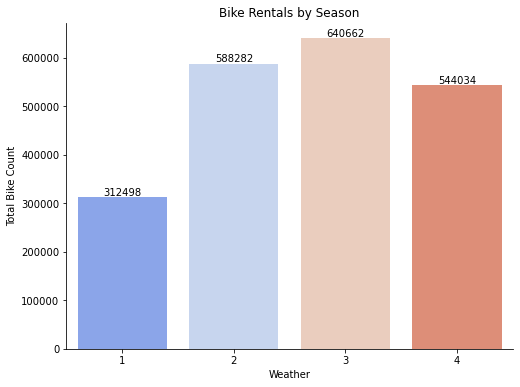

In [319]:
# Count of bike rented vs weather

# Calculate the sum of bike counts for each season
season_wise = df.groupby("season")["count"].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=season_wise.index, y=season_wise.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Weather")
plt.ylabel("Total Bike Count")
plt.title("Bike Rentals by Season")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Customize axis ticks and labels
plt.xticks(rotation=0)  # No rotation for x-axis labels

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

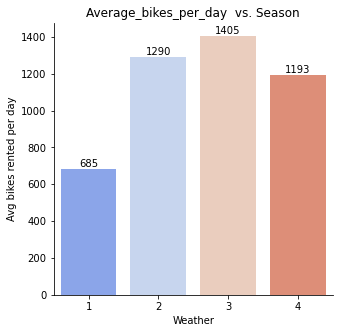

In [320]:
# Calculate the total count of rental bikes for diffrent season condition
season_wise = df.groupby("season")["count"].sum()

# Calculate the total number of unique days
total_days = df["date"].nunique()

# Calculate the average number of bikes rented per day for each season
average_bikes_per_day = season_wise / total_days

plt.figure(figsize=(5,5))
ax = sns.barplot(x=average_bikes_per_day.index, y=average_bikes_per_day.values ,palette = "coolwarm" )

# Add labels to the axes
plt.xlabel("Weather")
plt.ylabel("Avg bikes rented per day")
plt.title("Average_bikes_per_day  vs. Season")

# Add count values above the bars using bar_label
for container in ax.containers:
    ax.bar_label(container , fmt='%.0f')
    
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [321]:
season_unique = df["season"].unique()

# Create an empty dictionary to store season groups
season_groups = {}

for season_code in season_unique:
    # Filter the DataFrame for the specific season
    season_df = df.loc[df['season'] == season_code].copy()  # Using .copy() to create independent DataFrames
    
    # Reset the index
    season_df.reset_index(drop=True, inplace=True)
    
    # Store the DataFrame in the dictionary with the season code as the key
    season_groups[season_code] = season_df
    
# Access individual season groups using the dictionary
for season_code, season_df in season_groups.items():
    mean_count = (season_df['count'].sum()) / total_days 
    print(f"Mean value of bikes rented for season {season_code}: {mean_count}")


Mean value of bikes rented for season 1: 685.3026315789474
Mean value of bikes rented for season 2: 1290.092105263158
Mean value of bikes rented for season 3: 1404.9605263157894
Mean value of bikes rented for season 4: 1193.0570175438597


Testing assumptions for Season 1

Testing Normality Assumption:
Q-Q plot to visualize whether the distribution of 'count' follows a normal distribution


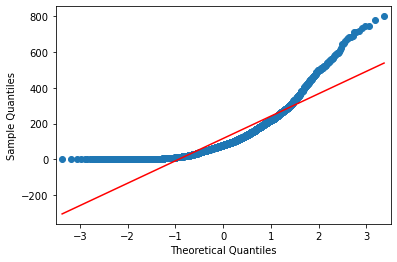

Conducting Shapiro-Wilk test to quantify our intuition
p value: 7.803901524994217e-08
Distribution of 'count' is not Gaussian 

Let's try to transform it to a normal distribution using Boxcox.
Q-Q plot for the transformed distribution


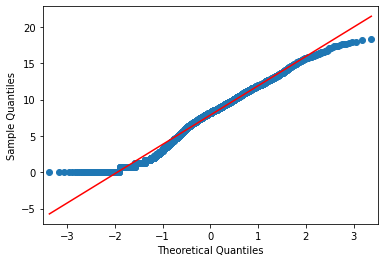


Conducting Shapiro-Wilk test for transformed data
p value: 0.01798204518854618
Transformed data is not Gaussian

As the transformed data is not normally distributed, we will perform Kruskal-Wallis test

Kruskal Test 
p value (Kruskal-Wallis): 2.479008372608633e-151
At least one season affects the 'count' of bikes rented



In [322]:
# 1. Checking normality assumption:
no_of_unique_seasons = len(df["season"].unique())
counter = 0

# Collect 'count' data from all seasons into a list or array
count_data_all = [season_df['count'] for season_df in season_groups.values()]

for season_code, season_df in season_groups.items():
    print(f"Testing assumptions for Season {season_code}\n")
    
    # Extract 'count' data for the current season
    count_data = season_df['count']
    
    # B1. Normality Assumption
    print("Testing Normality Assumption:")
    
    # Q-Q plot
    print("Q-Q plot to visualize whether the distribution of 'count' follows a normal distribution")
    qqplot(count_data, line='s')
    plt.show()

    # Shapiro-Wilk test
    print("Conducting Shapiro-Wilk test to quantify our intuition")
    test_stat, p_value = shapiro(count_data.sample(70 , replace =True))
    print(f"p value: {p_value}")

    if p_value < 0.05:
        print("Distribution of 'count' is not Gaussian \n")
        print("Let's try to transform it to a normal distribution using Boxcox.")

        # Box-cox transformation
        transformed_dis, _ = boxcox(count_data)
        print("Q-Q plot for the transformed distribution")
        qqplot(transformed_dis, line="s")
        plt.show()
        print()

        # Shapiro-Wilk test after transformation
        print("Conducting Shapiro-Wilk test for transformed data")        
        sample_size = 70  # Specify the sample size you want
        sample_transformed_dis = np.random.choice(transformed_dis, sample_size, replace=True)  # Randomly sample from transformed data
        test_stat, p_value = shapiro(sample_transformed_dis)
        print(f"p value: {p_value}")

        if p_value < 0.05:
            print("Transformed data is not Gaussian\n")

            # Kruskal test
            
            print("As the transformed data is not normally distributed, we will perform Kruskal-Wallis test\n")
            print(f"Kruskal Test ")
            

            kruskal_stat, p_value_kruskal = kruskal(*count_data_all)
            print(f"p value (Kruskal-Wallis): {p_value_kruskal}")

            if p_value_kruskal < 0.05:
                print(f"At least one season affects the 'count' of bikes rented\n")
                break
            else:
                print(f"No season affects the 'count' of bikes rented\n")
                break
        else:
            print("Transformed data is Gaussian\n")

    else:
        print("Distribution of 'count' is Gaussian\n")
        counter += 1

#######################################################################################################################        
        
# Check if counter equals the number of unique seasons to perform Levene's test
if counter == no_of_unique_seasons:
    
    # B2. Levene Test
    print("Testing Homogeneity of Variances Assumption (Levene's Test):")
    print("Levene's Test")
    
    # Collect 'count' data from all seasons into a list or array
    count_data_all = [season_df['count'] for season_df in season_groups.values()]
    
    statistic_levene, p_value_levene = levene(*count_data_all)

    print(f"p value: {p_value_levene}")

    if p_value_levene < 0.05:
        print("Variance is not homogeneous\n")

        # Kruskal test for all seasons
        print("Kruskal Test for All Seasons vs 'count'")
        print("As variance between the groups is not the same, we will perform Kruskal-Wallis test for all seasons")

        kruskal_stat, p_value_kruskal = kruskal(*count_data_all)
        print(f"p value (Kruskal-Wallis): {p_value_kruskal}")

        if p_value_kruskal < 0.05:
            print("At least one season affects the 'count' of bikes rented\n")
        else:
            print("No season affects the 'count' of bikes rented\n")
    else:
        print("Variance is homogeneous\n")

        # ANOVA for all seasons (if normality assumption holds for all seasons)
        print("Conducting ANOVA for All Seasons:")
        f_stat, p_value_anova = f_oneway(*count_data_all)

        if p_value_anova < 0.05:
            print("At least one season affects the 'count' of bikes rented\n")
        else:
            print("No season affects the 'count' of bikes rented\n")


### 3. Chi-square test to check if Weather is dependent on the season

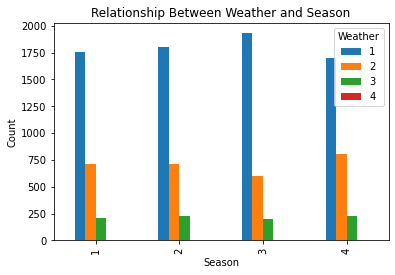

In [323]:
# Create a grouped DataFrame
grouped_df = df.groupby(['season', 'weather']).size().unstack()

# Create a clustered bar plot
grouped_df.plot(kind='bar', stacked=False)
plt.title("Relationship Between Weather and Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title='Weather', labels=["1","2","3","4"], loc='upper right')
plt.show()

In [324]:
# Assuming your dataset has columns 'weather' and 'season'
# Create a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'],margins = True)
contingency_table 

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [325]:
# Perform the Chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between weather and season.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between weather and season.")

Chi-squared statistic: 49.15865559689363
Degrees of freedom: 16
p-value: 3.1185273325126814e-05
Reject the null hypothesis: There is a significant relationship between weather and season.


## Insights & conclusions:

### 1. From EDA :

1. More vehicles were rented on holidays.
2. For spring seasson (season 1) least bikes were rented.
3. Observation : For weather 1 most bikes were rented. For weather 4 we have only one data point.
4. Most bike is rented in temp range between 25 - 32. Bike rented least when temp is too cold (<10) or too hot (>35).
5. Most bike is rented in humidity level ranges between 45 - 55. Bike rented least when temp is less humidity level (<35).For higher humidity it is highly variable more analysis need to be done.
6. Most bike is rented when wind speed in calm i.e rounded off to 0 , and when speed between 7 to 12.Sharp decline in the bike rented as the speed increses from 12.
7. Most bike is rented time interval (07:00 AM - 09:00 AM) & (04:00 PM to 06:00 PM)

### 2. From Hypothesis test

1. There is no significant difference in the mean number of bike rentals between working and non-working days.Difference in mean is by chance.
2.  At least one weather condition affects the bike being rented.
3. At least one season affects the bike being rented.
4. There is a significant relationship between weather and season.